# Top Earners in Movie Industry

## Table of Contents

<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="#intro"></a>
## Introduction

> This analysis project is to be done using the imdb movie data. When the analysis is completed, you should be able to find the top 5 highest grossing directors, the top 5 highest grossing movie genres of all time, comparing the revenue of the highest grossing movies and which companies released the most movies. 

> There are 10 columns that will not be needed for the analysis. Use pandas to drop these columns. HINT: Only the columns pertaining to revenue will be needed.

> To get you started, I've already placed the needed code for getting the packages and datafile that you will be using for the project. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('imdb-movies.csv')

### Drop columns without neccesary information and remove all records with no financial information -- Pay close attention to things that don't tell you anything regarding financial data

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.drop(['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'release_date', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10866 non-null  int64  
 1   revenue               10866 non-null  int64  
 2   original_title        10866 non-null  object 
 3   director              10822 non-null  object 
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   release_year          10866 non-null  int64  
 7   budget_adj            10866 non-null  float64
 8   revenue_adj           10866 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 764.1+ KB


### Data Cleaning

In [7]:
# Delete all records with null, or empty values
df.isna().sum()
df[df.isna().any(axis=1)]

,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
228,0,0,Racing Extinction,Louie Psihoyos,Adventure|Documentary,NaN,2015,0.0,0.0
259,0,0,Crown for Christmas,Alex Zamm,TV Movie,NaN,2015,0.0,0.0
295,0,0,12 Gifts of Christmas,Peter Sullivan,Family|TV Movie,NaN,2015,0.0,0.0
298,0,0,The Girl in the Photographs,Nick Simon,Crime|Horror|Thriller,NaN,2015,0.0,0.0
328,0,0,Advantageous,Jennifer Phang,Science Fiction|Drama|Family,NaN,2015,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10804,0,0,Interiors,Woody Allen,Drama,NaN,1978,0.0,0.0
10806,0,0,Gates of Heaven,Errol Morris,Documentary,NaN,1978,0.0,0.0
10816,0,0,The Rutles: All You Need Is Cash,Eric Idle|Gary Weis,Comedy,NaN,1978,0.0,0.0
10842,0,0,Winnie the Pooh and the Honey Tree,Wolfgang Reitherman,Animation|Family,NaN,1966,0.0,0.0


In [8]:
df.dropna(inplace=True)
df.isna().sum()

budget                  0
revenue                 0
original_title          0
director                0
genres                  0
production_companies    0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [9]:
df.isnull().sum()

budget                  0
revenue                 0
original_title          0
director                0
genres                  0
production_companies    0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Here's a helpful hint from my own analysis when I ran this the first time. This may help shed light on what your data set should look like.

#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

In [10]:
df.to_csv('imdb_genres.csv', index=False)
df.to_csv('imdb_production_company.csv', index=False)

In [11]:
df_genres = pd.read_csv('imdb_genres.csv')
df_production_company = pd.read_csv('imdb_production_company.csv')

In [12]:
df_genres.drop('production_companies', axis=1, inplace=True)
df_production_company.drop('genres', axis=1, inplace=True)

In [13]:
df_genres.head()

,budget,revenue,original_title,director,genres,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [14]:
multiple_genres = df_genres[df_genres.genres.str.contains('|', regex=False)]
multiple_genres.genres.count()

7833

In [15]:
primary_genre = multiple_genres.copy()
secondary_genres = multiple_genres.copy()

while multiple_genres.genres.count() > 0:
    primary_genre['genres'] = primary_genre['genres'].apply(lambda x:x.split('|')[0])
    secondary_genres['genres'] = secondary_genres['genres'].apply(lambda x:'|'.join(x.split('|')[1:]))
    
    df_genres.drop(multiple_genres.index, inplace=True)
    df_genres = df_genres.append(primary_genre.append(secondary_genres), ignore_index=True)

    multiple_genres = df_genres[df_genres.genres.str.contains('|', regex=False)]

df_genres[df_genres.genres.str.contains('|', regex=False)]

df_genres


,budget,revenue,original_title,director,genres,release_year,budget_adj,revenue_adj
0,150000000,682330139,Mission: Impossible - Rogue Nation,Christopher McQuarrie,Action,2015,1.379999e+08,6.277435e+08
1,68000000,215863606,Ted 2,Seth MacFarlane,Comedy,2015,6.255997e+07,1.985944e+08
2,35000000,194564672,The Intern,Nancy Meyers,Comedy,2015,3.219999e+07,1.789994e+08
3,20000000,36606743,Burnt,John Wells,Drama,2015,1.839999e+07,3.367819e+07
4,15000000,64191523,The Danish Girl,Tom Hooper,Drama,2015,1.379999e+07,5.905618e+07
...,...,...,...,...,...,...,...,...
57556,0,0,"The Russians Are Coming, The Russians Are Coming",Norman Jewison,,1966,0.000000e+00,0.000000e+00
57557,0,0,Seconds,John Frankenheimer,,1966,0.000000e+00,0.000000e+00
57558,0,0,Grand Prix,John Frankenheimer,,1966,0.000000e+00,0.000000e+00
57559,0,0,Beregis Avtomobilya,Eldar Ryazanov,,1966,0.000000e+00,0.000000e+00


In [16]:
df_genres = df_genres[df_genres['genres'] != '']
df_genres

,budget,revenue,original_title,director,genres,release_year,budget_adj,revenue_adj
0,150000000,682330139,Mission: Impossible - Rogue Nation,Christopher McQuarrie,Action,2015,1.379999e+08,6.277435e+08
1,68000000,215863606,Ted 2,Seth MacFarlane,Comedy,2015,6.255997e+07,1.985944e+08
2,35000000,194564672,The Intern,Nancy Meyers,Comedy,2015,3.219999e+07,1.789994e+08
3,20000000,36606743,Burnt,John Wells,Drama,2015,1.839999e+07,3.367819e+07
4,15000000,64191523,The Danish Girl,Tom Hooper,Drama,2015,1.379999e+07,5.905618e+07
...,...,...,...,...,...,...,...,...
57531,1377800,0,Batman,Leslie H. Martinson,Crime,1966,9.256081e+06,0.000000e+00
57539,12000000,20000000,The Sand Pebbles,Robert Wise,Romance,1966,8.061618e+07,1.343603e+08
57544,0,0,Khartoum,Basil Dearden|Eliot Elisofon,Action,1966,0.000000e+00,0.000000e+00
57550,0,0,Harper,Jack Smight,Mystery,1966,0.000000e+00,0.000000e+00


In [17]:
df_production_company.head()

,budget,revenue,original_title,director,production_companies,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


In [18]:
multiple_companies = df_production_company[df_production_company.production_companies.str.contains('|', regex=False)]
multiple_companies.production_companies.count()

6392

In [19]:
primary_company = multiple_companies.copy()
secondary_companies = multiple_companies.copy()

while multiple_companies.production_companies.count() > 0:
    primary_company['production_companies'] = primary_company['production_companies'].apply(lambda x:x.split('|')[0])
    secondary_companies['production_companies'] = secondary_companies['production_companies'].apply(lambda x:'|'.join(x.split('|')[1:]))
    
    df_production_company.drop(multiple_companies.index, inplace=True)
    df_production_company = df_production_company.append(primary_company.append(secondary_companies), ignore_index=True)

    multiple_companies = df_production_company[df_production_company.production_companies.str.contains('|', regex=False)]

df_production_company[df_production_company.production_companies.str.contains('|', regex=False)]

df_production_company


,budget,revenue,original_title,director,production_companies,release_year,budget_adj,revenue_adj
0,130000000,518602163,Ant-Man,Peyton Reed,Marvel Studios,2015,1.195999e+08,4.771138e+08
1,12000000,85512300,Paper Towns,Jake Schreier,Fox 2000 Pictures,2015,1.104000e+07,7.867128e+07
2,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,Furthur Films,2015,0.000000e+00,4.222338e+04
3,0,0,Mythica: The Darkspore,Anne K. Black,Arrowstorm Entertainment,2015,0.000000e+00,0.000000e+00
4,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,Indian Paintbrush,2015,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
47551,0,0,The Chase,Arthur Penn,,1966,0.000000e+00,0.000000e+00
47552,0,0,Nevada Smith,Henry Hathaway,,1966,0.000000e+00,0.000000e+00
47553,0,0,Seconds,John Frankenheimer,,1966,0.000000e+00,0.000000e+00
47554,0,0,Carry On Screaming!,Gerald Thomas,,1966,0.000000e+00,0.000000e+00


In [20]:
df_production_company = df_production_company[df_production_company['production_companies'] != '']
df_production_company

,budget,revenue,original_title,director,production_companies,release_year,budget_adj,revenue_adj
0,130000000,518602163,Ant-Man,Peyton Reed,Marvel Studios,2015,1.195999e+08,4.771138e+08
1,12000000,85512300,Paper Towns,Jake Schreier,Fox 2000 Pictures,2015,1.104000e+07,7.867128e+07
2,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,Furthur Films,2015,0.000000e+00,4.222338e+04
3,0,0,Mythica: The Darkspore,Anne K. Black,Arrowstorm Entertainment,2015,0.000000e+00,0.000000e+00
4,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,Indian Paintbrush,2015,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
47261,42000000,20844907,Super Mario Bros.,Annabel Jankel|Rocky Morton,Nintendo,1993,6.339774e+07,3.146476e+07
47273,20000000,153698625,Free Willy,Simon Wincer,Donner/Shuler-Donner Productions,1993,3.018940e+07,2.320035e+08
47299,25000000,6,The House of the Spirits,Bille August,Neue Constantin Film,1993,3.773675e+07,9.056820e+00
47398,24500000,17218023,The Mission,Roland JoffÃ©,Kingsmere Productions Ltd.,1986,4.874046e+07,3.425365e+07


<a id="eda"></a>
## Exploratory Data Analysis

> Use Matplotlib to display your data analysis

### Which production companies released the most movies in the last 10 years? Display the top 5 production companies.

In [21]:
df_production_company_decade = df_production_company.query('release_year >= 2012').copy()
df_production_company_decade.production_companies.value_counts()

Universal Pictures                        183
Paramount Pictures                        134
Columbia Pictures                         131
Walt Disney Pictures                       97
Twentieth Century Fox Film Corporation     88
                                         ... 
Hasbro Studios                              1
PalmStar Entertainment                      1
Evil Media Empire                           1
Panay Films                                 1
CinÃ©mage                                   1
Name: production_companies, Length: 2285, dtype: int64

In [22]:
number_of_releases = df_production_company_decade.production_companies.value_counts().index
number_of_releases

Index(['Universal Pictures', 'Paramount Pictures', 'Columbia Pictures',
       'Walt Disney Pictures', 'Twentieth Century Fox Film Corporation',
       'BBC Films', 'New Line Cinema', 'Lionsgate', 'Summit Entertainment',
       'StudioCanal',
       ...
       'Boss Media', 'Rich Animation Studios', 'Hammerton Productions',
       'Winkler Films', 'Citizen Jones', 'Hasbro Studios',
       'PalmStar Entertainment', 'Evil Media Empire', 'Panay Films',
       'CinÃ©mage'],
      dtype='object', length=2285)

In [23]:
df_production_company_top_five = pd.DataFrame()
for company in number_of_releases[:5]:
    df_production_company_top_five = df_production_company_top_five.append(df_production_company_decade.query('production_companies == @company'))
df_production_company_top_five

,budget,revenue,original_title,director,production_companies,release_year,budget_adj,revenue_adj
5,0,0,The Scorpion King: The Lost Throne,Mike Elliott,Universal Pictures,2015,0.000000e+00,0.000000e+00
1261,50000000,234989584,American Reunion,Jon Hurwitz|Hayden Schlossberg,Universal Pictures,2012,4.748721e+07,2.231800e+08
1633,6000000,0,All Things To All Men,George Isaac,Universal Pictures,2013,5.616200e+06,0.000000e+00
3419,190000000,1506249360,Furious 7,James Wan,Universal Pictures,2015,1.747999e+08,1.385749e+09
3423,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,Universal Pictures,2015,6.807997e+07,1.064192e+09
...,...,...,...,...,...,...,...,...
37431,45000000,376141306,Taken 2,Olivier Megaton,Twentieth Century Fox Film Corporation,2012,4.273849e+07,3.572381e+08
37459,15000000,145000000,Chronicle,Josh Trank,Twentieth Century Fox Film Corporation,2012,1.424616e+07,1.377129e+08
37537,58000000,50365377,Red Tails,Anthony Hemingway,Twentieth Century Fox Film Corporation,2012,5.508517e+07,4.783423e+07
38192,120000000,415440673,The Wolverine,James Mangold,Twentieth Century Fox Film Corporation,2013,1.123240e+08,3.888663e+08


Text(0, 0.5, 'Number of Releases')

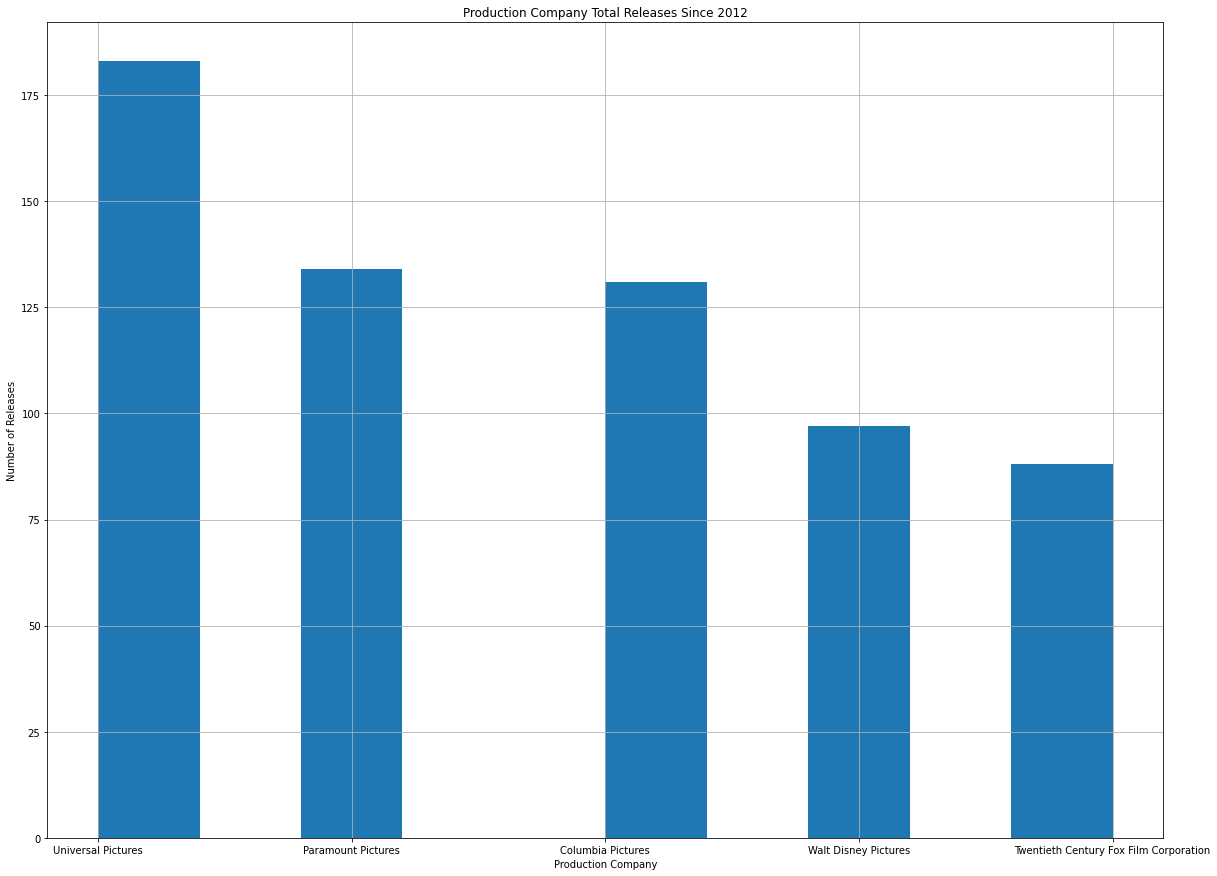

In [24]:
df_production_company_top_five.production_companies.hist(figsize=(20,15))
plt.title('Production Company Total Releases Since 2012')
plt.xlabel('Production Company')
plt.ylabel('Number of Releases')

### What 5 movie genres grossed the highest all-time?

In [26]:
df_genres.groupby(['genres']).revenue.sum().nlargest(5)

genres
Action       401958655011
Adventure    313022024985
Comedy       230990378289
Drama        224975762718
Thriller     119764868534
Name: revenue, dtype: int64

### Who are the top 5 grossing directors?

In [27]:
df.groupby(['director']).revenue.sum().nlargest(5)

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
Name: revenue, dtype: int64

### Compare the revenue of the highest grossing movies of all time.

In [28]:
df_best_ever = df.nlargest(20, 'revenue')
df_best_ever

,budget,revenue,original_title,director,genres,production_companies,release_year,budget_adj,revenue_adj
1386,237000000,2781505847,Avatar,James Cameron,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009,2.408869e+08,2.827124e+09
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
5231,200000000,1845034188,Titanic,James Cameron,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997,2.716921e+08,2.506406e+09
4361,220000000,1519557910,The Avengers,Joss Whedon,Science Fiction|Action|Adventure,Marvel Studios,2012,2.089437e+08,1.443191e+09
0,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
4,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09
14,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015,2.575999e+08,1.292632e+09
3374,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,David Yates,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011,1.211748e+08,1.287184e+09
5422,150000000,1274219009,Frozen,Chris Buck|Jennifer Lee,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,2013,1.404050e+08,1.192711e+09
5425,200000000,1215439994,Iron Man 3,Shane Black,Action|Adventure|Science Fiction,Marvel Studios,2013,1.872067e+08,1.137692e+09


Text(0, 0.5, 'Total Revenue')

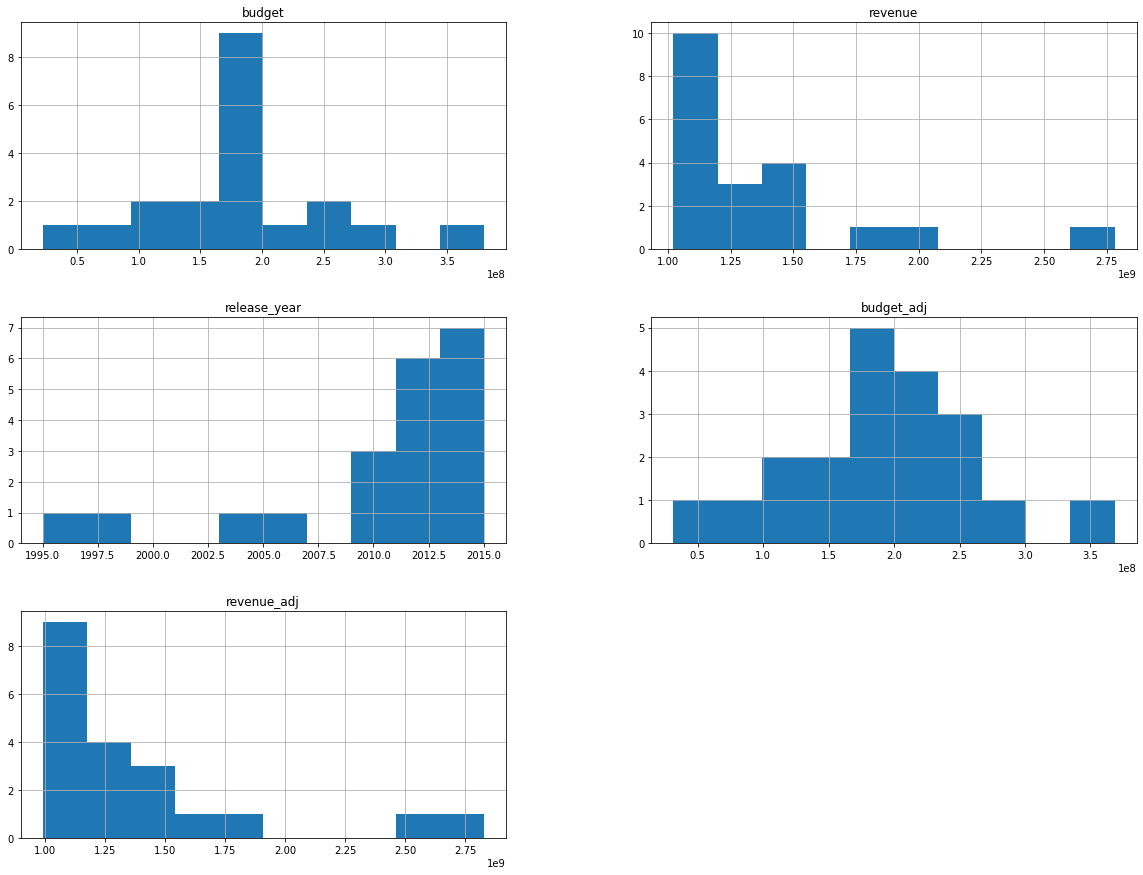

In [29]:
df_best_ever.hist(figsize=(20,15))
plt.title('Top 20 Movies of All Time by Revenue')
plt.xlabel('Movie Title')
plt.ylabel('Total Revenue')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

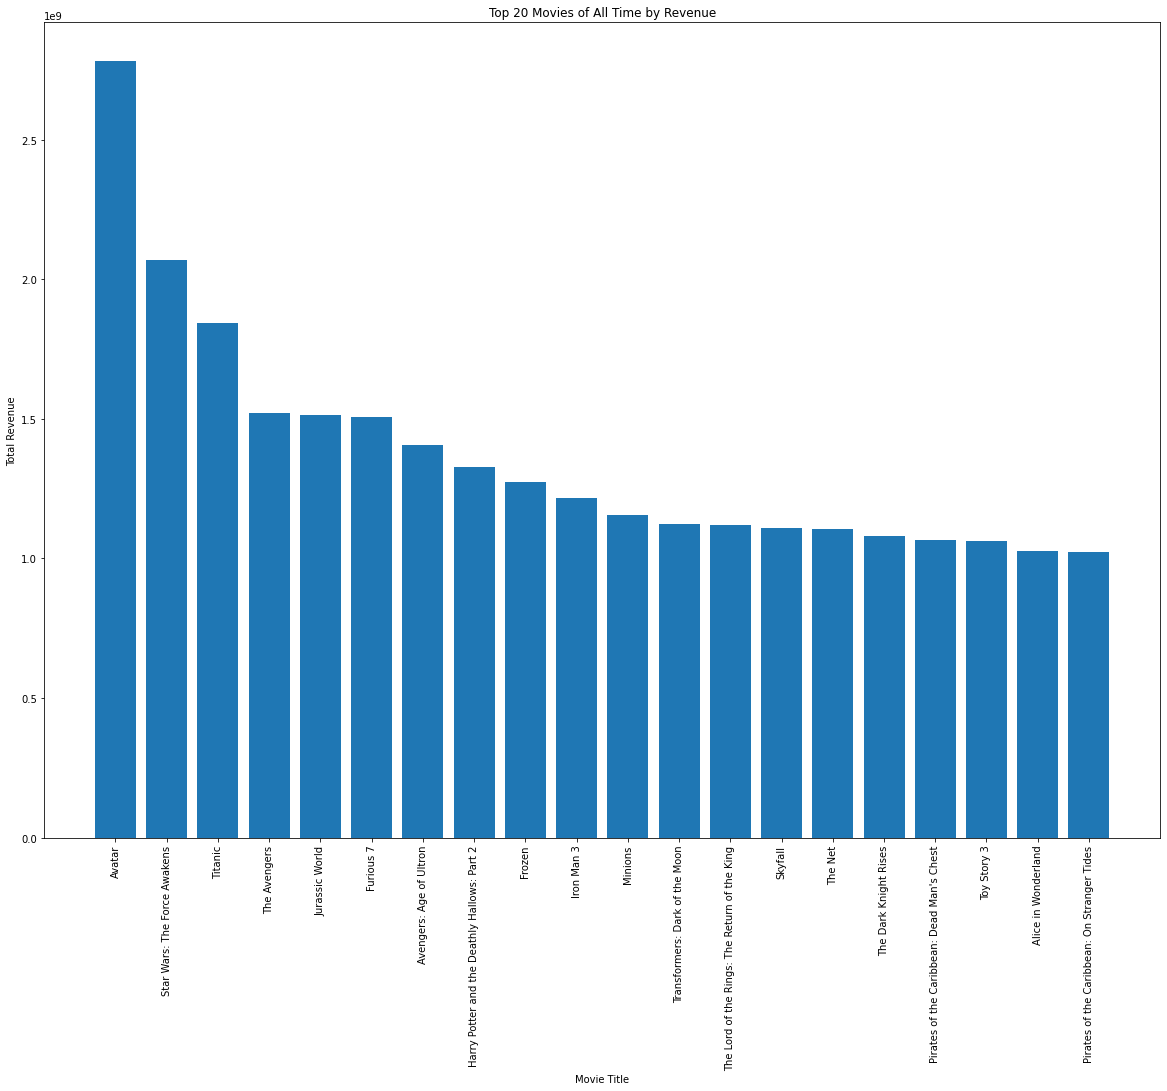

In [33]:
plt.subplots(figsize=(20, 15))
plt.bar(df_best_ever['original_title'], df_best_ever['revenue'])
plt.title('Top 20 Movies of All Time by Revenue')
plt.xlabel('Movie Title')
plt.ylabel('Total Revenue')
plt.xticks(rotation='vertical')

<a id="conclusions"></a>
## Conclusions

> Using the cell below, write a brief conclusion of what you have found from the anaylsis of the data. The Cell below will allow you to write plan text instead of code.

Avatar and Titanic (with adj rev) are in a league of their own. James Cameron did an incredible job, even though Spielberg appears to be the GOAT of directors. Action and adventure movies appear to be the best performing genres, with a handful of animated family movies like Frozen, Minions, Toy Story 3 performing very well.